# Intro

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.preprocessing import PolynomialFeatures

In [2]:
n = ['archive/%0.2i.csv' % i for i in range(2015,2020)]

In [3]:
dfs=[pd.read_csv(i) for i in n]

In [4]:
dfs=[pd.read_csv(i) for i in n]
colnames = ['Country','GDP','Health','Freedom','Generosity','orruption','Family','Social','Score']
newdf=pd.DataFrame()

In [5]:
for k in colnames:
    newdf[k]=pd.concat([j[i] for j in dfs for i in j.columns if k in i]).reset_index(drop=True)
    
newdf.loc[newdf.Family.isnull(),'Family'] = newdf['Social'].dropna().values
newdf=newdf.drop(columns='Social')
newdf.rename(columns={'orruption':'Corruption'}, inplace=True)
newdf=newdf.dropna().set_index('Country')

<AxesSubplot:>

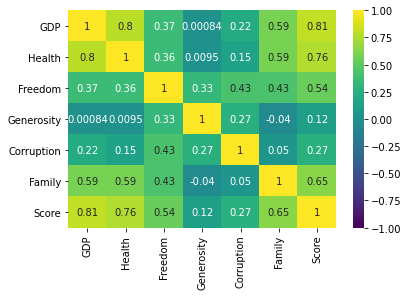

In [6]:
sns.heatmap(newdf.corr(method='spearman'), vmin=-1, vmax=1, center=0, cmap="viridis", annot=True)

In [7]:
X = newdf.iloc[:,:-1]
y = newdf.iloc[:,-1]

In [8]:
fs = SelectKBest(score_func=f_regression, k=3)
X_selected = fs.fit_transform(X, y)

In [9]:
X.loc[:,fs.get_support()]

,GDP,Health,Family
Country,,,
Switzerland,1.39651,0.94143,1.34951
Iceland,1.30232,0.94784,1.40223
Denmark,1.32548,0.87464,1.36058
Norway,1.45900,0.88521,1.33095
Canada,1.32629,0.90563,1.32261
...,...,...,...
Rwanda,0.35900,0.61400,0.71100
Tanzania,0.47600,0.49900,0.88500
Afghanistan,0.35000,0.36100,0.51700


In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.30)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)
r_sq = model.score(X_test, y_test)

In [12]:
r_sq

0.7433645226008092

In [13]:
y_pred = model.predict(X_test)

In [14]:
X_traint = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)

In [15]:
X_testt = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test)

In [16]:
model = LinearRegression().fit(X_traint,y_train)

In [17]:
r_sq = model.score(X_testt, y_test)
r_sq

0.7716108352695896

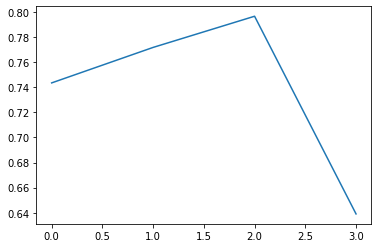

In [18]:
l=[]
for i in range(1,5):
    X_traint = PolynomialFeatures(degree=i, include_bias=False).fit_transform(X_train)
    X_testt = PolynomialFeatures(degree=i, include_bias=False).fit_transform(X_test)
    model = LinearRegression().fit(X_traint,y_train)
    l.append(model.score(X_testt, y_test))
    
plt.plot(l)